# **Linear Regression**

In [1]:
# run this cell if you're using Google Colab
try:
    import google.colab
    IN_COLAB = True
except:
    IN_COLAB = False

if IN_COLAB:
  import sys
  import os
  !git clone https://github.com/satishchandrareddy/WhatisML.git
  code_location = "/content/WhatisML/Code/Supervised"
  sys.path.append(os.path.abspath(code_location))

Cloning into 'WhatisML'...
remote: Enumerating objects: 537, done.
remote: Counting objects: 100% (26/26), done.
remote: Compressing objects: 100% (5/5), done.
remote: Total 537 (delta 23), reused 21 (delta 21), pack-reused 511
Receiving objects: 100% (537/537), 24.17 MiB | 15.78 MiB/s, done.
Resolving deltas: 100% (298/298), done.
Updating files: 100% (43/43), done.


## **Import Libraries**

In [2]:
%matplotlib inline
import example_regression
import matplotlib.pyplot as plt
import NeuralNetwork
import numpy as np
import Optimizer
import plot_results

## **Settings to Change**
If you would like to experiment, here are settings to change

In [3]:
# Things to try:
# Change random seed to get different random numbers: seed (integer)
# Change number of data samples: nsample
# Change learning rate for optimization: learning_rate >0
# Change number of iterations: niteration
seed = 100
nsample = 500
learning_rate = 0.1
niteration = 100

### **1. Set up Data**

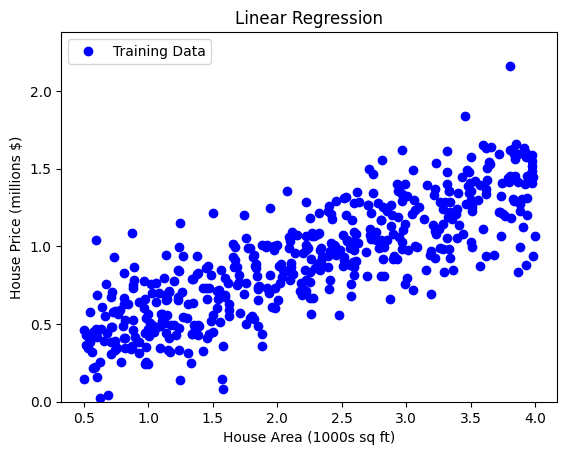

In [4]:
np.random.seed(seed)
nfeature = 1
X,Y = example_regression.example(nfeature,nsample)
plot_results.plot_results_linear(X,Y)

### **2. Define Model**

In [5]:
model = NeuralNetwork.NeuralNetwork(1)
model.add_layer(1,"linear")
# set initial guess for W and b
initial_param = [{"W": -0.2, "b":1.4}]
model.set_param(initial_param)

### **3. Specify Loss Function and Optimization Routine**

In [6]:
optimizer = Optimizer.GradientDescent(learning_rate)
model.compile("meansquarederror",optimizer)

### **4. Learning**

In [7]:
history = model.fit(X,Y,niteration)

Iteration: 1 - Loss: 0.26955882198019204 - Accuracy: 0.42800281584570193
Iteration: 2 - Loss: 0.25348005618275565 - Accuracy: 0.41631856837875614
Iteration: 3 - Loss: 0.2404503588252042 - Accuracy: 0.4039960921711821
Iteration: 4 - Loss: 0.22849975407795955 - Accuracy: 0.39368943925167127
Iteration: 5 - Loss: 0.21730971817352904 - Accuracy: 0.38347154277020923
Iteration: 6 - Loss: 0.20679851002841967 - Accuracy: 0.3738666745877025
Iteration: 7 - Loss: 0.19692019920727236 - Accuracy: 0.36462817162334643
Iteration: 8 - Loss: 0.1876360031569627 - Accuracy: 0.3557653641689922
Iteration: 9 - Loss: 0.1789100940224312 - Accuracy: 0.3472071687526072
Iteration: 10 - Loss: 0.17070888671516837 - Accuracy: 0.3389614556505636
Iteration: 11 - Loss: 0.1630008282072235 - Accuracy: 0.33106082745962045
Iteration: 12 - Loss: 0.15575626457362643 - Accuracy: 0.3234414815542639
Iteration: 13 - Loss: 0.1489473252684734 - Accuracy: 0.3161219513850011
Iteration: 14 - Loss: 0.14254781567119798 - Accuracy: 0.309

## **5. Plot results**

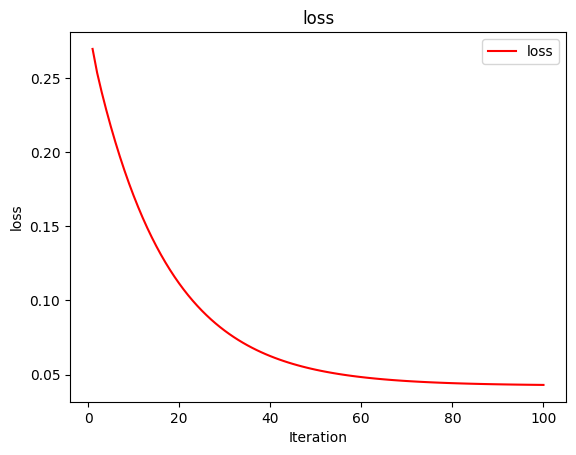

In [8]:
# plot loss
plot_results.plot_results_history(history,["loss"])

In [9]:
# training process animation
plt.rcParams["animation.html"]="jshtml"
ani = plot_results.plot_results_linear_animation(X,Y,model)
plt.close()
ani